In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 8)  # Default plot size

#from xmovie import Movie
import proplot as plot

/Users/arindanmandal/opt/miniconda3/envs/uwgdabook/lib/python3.10/site-packages/proplot/__init__.py:30: ProplotWarning: Found conflicting default user proplotrc files at '/Users/arindanmandal/.proplotrc' and '/Users/arindanmandal/.proplot/proplotrc'. Ignoring the second one.
  from .config import *  # noqa: F401 F403
/Users/arindanmandal/opt/miniconda3/envs/uwgdabook/lib/python3.10/site-packages/proplot/__init__.py:30: ProplotWarning: Found conflicting default user proplotrc files at '/Users/arindanmandal/.proplotrc' and '/Users/arindanmandal/.proplot/proplotrc'. Ignoring the second one.
  from .config import *  # noqa: F401 F403


In [2]:
%matplotlib inline 

# DJFMA (monthly wind and vertically intergrated moisture divergence)

## Wind

In [3]:
ds = xr.open_dataset('era5_geop_u_v_2009_2020.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 121, time: 60)
Coordinates:
  * longitude  (longitude) float32 40.0 40.25 40.5 40.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2009-01-01 2009-02-01 ... 2020-12-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-12 10:11:36 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [4]:
# Monthly climatology
monthly_u = ds.u.groupby('time.month').mean('time')
monthly_v = ds.v.groupby('time.month').mean('time')

In [5]:
# WS at monthly
# u = ds.u.mean('time').load()
# v = ds.v.mean('time').load()

monthly_ws = (monthly_u**2 + monthly_v**2)**0.5

## Vertically integrated moisture 

In [7]:
ver = xr.open_dataset('era5_vertical_2009_2020_DJFMA.nc')
ver

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 121, time: 60)
Coordinates:
  * longitude  (longitude) float32 40.0 40.25 40.5 40.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2009-01-01 2009-02-01 ... 2020-12-01
Data variables:
    vimd       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-12 13:13:41 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [9]:
# monthly ver
monthly_ver = ver.vimd.groupby('time.month').mean('time')
monthly_ver

<xarray.DataArray 'vimd' (month: 5, latitude: 121, longitude: 281)>
array([[[-1.4393829e+00, -1.3912991e+00, -1.4049035e+00, ...,
         -3.8173547e-01, -4.0271378e-01, -3.9336744e-01],
        [-1.5188313e+00, -1.4685661e+00, -1.4241165e+00, ...,
         -3.5618782e-01, -3.3925948e-01, -3.2108498e-01],
        [-1.5373174e+00, -1.5114578e+00, -1.4672160e+00, ...,
         -3.2233110e-01, -3.0540338e-01, -1.9729121e-01],
        ...,
        [ 1.3983189e+00,  8.7261105e-01,  5.1234198e-01, ...,
          1.6688579e+00,  1.1465774e+00,  4.6083054e-01],
        [ 3.9004695e+00,  2.9719124e+00,  9.7251844e-01, ...,
          1.4472343e+00,  1.1519780e+00,  6.2969702e-01],
        [ 6.7509460e+00,  5.6241322e+00,  2.4661436e+00, ...,
          1.0383617e+00,  7.2825414e-01,  6.9554061e-01]],

       [[-1.0569930e+00, -1.0475426e+00, -1.0736099e+00, ...,
         -3.9710602e-01, -4.3054691e-01, -4.4498253e-01],
        [-1.1290678e+00, -1.1179553e+00, -1.1081930e+00, ...,
         -3.8651276e-01, -3.8132000e-01, -3.8827848e-01],
        [-1.1321834e+00, -1.1515002e+00, -1.1415305e+00, ...,
         -3.5847220e-01, -3.5379919e-01, -2.5638404e-01],
...
        [ 6.4984447e-01, -4.5386949e-03, -3.8661686e-01, ...,
         -2.7424702e-01, -2.8203583e-01,  5.8960932e-01],
        [ 2.4097517e+00,  1.5929414e+00,  3.4586444e-01, ...,
         -1.8898296e-01, -5.9193563e-01,  6.0548782e-03],
        [ 3.9633014e+00,  3.4068520e+00,  1.7739582e+00, ...,
         -2.8632641e-02, -5.3315449e-01, -8.0410939e-01]],

       [[-1.4066690e+00, -1.3505883e+00, -1.3774862e+00, ...,
         -7.2912675e-01, -7.7523756e-01, -7.8323460e-01],
        [-1.4532995e+00, -1.3948298e+00, -1.3502765e+00, ...,
         -6.5829849e-01, -6.5788287e-01, -6.5404052e-01],
        [-1.4397985e+00, -1.4117583e+00, -1.3677241e+00, ...,
         -5.9422046e-01, -5.9453219e-01, -4.4041300e-01],
        ...,
        [ 1.1854186e+00,  5.7953531e-01,  2.1365802e-01, ...,
          4.0330911e+00,  3.0088844e+00,  1.0104252e+00],
        [ 3.2555377e+00,  2.3796341e+00,  8.2400769e-01, ...,
          3.6995125e+00,  3.3720615e+00,  1.8530949e+00],
        [ 5.5277557e+00,  4.6795807e+00,  2.2657063e+00, ...,
          2.5732179e+00,  2.2519975e+00,  2.2172067e+00]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 40.0 40.25 40.5 40.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * month      (month) int64 1 2 3 4 12

#### Test plot

In [ ]:
ws = (u**2 + v**2)**0.5
ax = plt.axes(projection=ccrs.PlateCarree())
strm = ax.streamplot(u.longitude, u.latitude, u.values, v.values, transform=ccrs.PlateCarree(),
                     density=10, color=ws.values, cmap=plt.get_cmap('rdbu'))
#plt.colorbar(strm.lines)
cbar = plt.colorbar(strm.lines)
cbar.set_label('Wind speed [m/s]')

# AWS-M
chhota_lon = 77.51
chhota_lat = 32.23
ax.plot(chhota_lon, chhota_lat, marker='s', markersize=4, color='k', alpha=0.7)
ax.text(chhota_lon, chhota_lat, 'AWS-M', horizontalalignment='right', alpha=0.7, size=12)

ax.coastlines(color='grey');
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.4)
ax.gridlines(draw_labels=True);
plt.show()

# Final plot with `proplot`

#### This plot idea/code is taken from M Lalande GitHub repo (below)
#### https://github.com/mickaellalande/CMIP6_HMA_paper/blob/main/fig1_topo-clim.ipynb

/var/folders/2h/wfxjkxm532760fd5sdwy6q1h0000gn/T/ipykernel_743/921362300.py:46: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.plot(chhota_lon, chhota_lat, marker='s', markersize=2, color='k', alpha=0.7)
/var/folders/2h/wfxjkxm532760fd5sdwy6q1h0000gn/T/ipykernel_743/921362300.py:47: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.text(chhota_lon, chhota_lat, 'AWS-M', horizontalalignment='right', alpha=0.7, size=8)


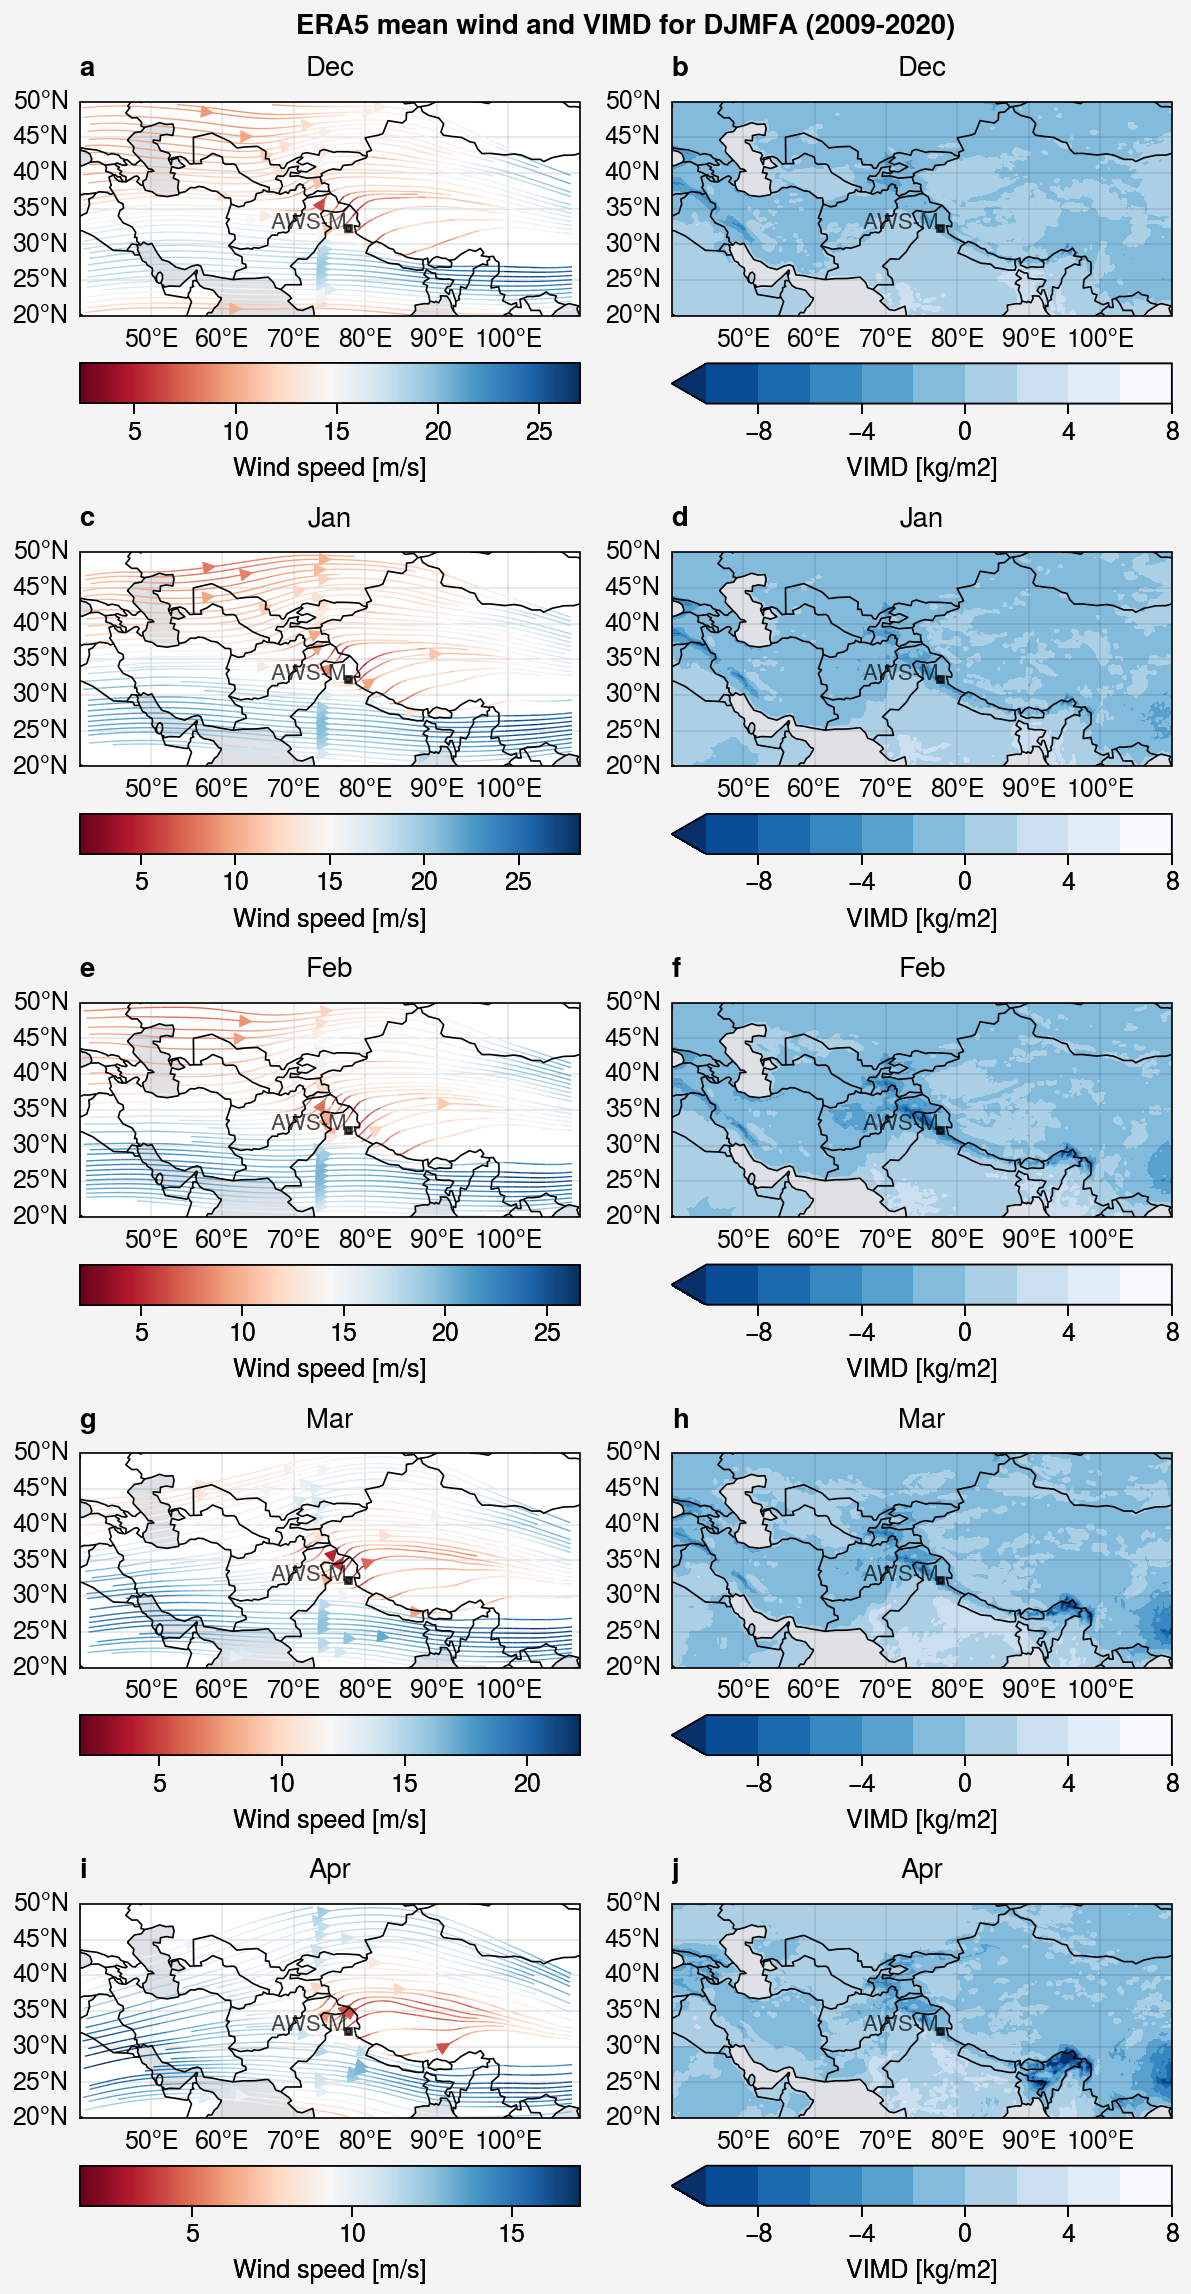

In [37]:
f, axs = plot.subplots(proj='cyl', ncols=2, nrows=5)

# Dec
strm = axs[0].streamplot(monthly_u[4].longitude, monthly_u[4].latitude, monthly_u[4].values, monthly_v[4].values, 
                         density=10, color=monthly_ws[4].values, cmap=plt.get_cmap('rdbu'), linewidth=0.5)
axs[0].colorbar(strm.lines, label='Wind speed [m/s]', loc='b')

ver1 = axs[1].contourf(monthly_ver[4], extend='min', cmap='Blues_r', levels=plot.arange(-10,8, 2))
axs[1].colorbar(ver1, loc='b', label='VIMD [kg/m2]')

# Jan
strm = axs[2].streamplot(monthly_u[0].longitude, monthly_u[0].latitude, monthly_u[0].values, monthly_v[0].values, 
                         density=10, color=monthly_ws[0].values, cmap=plt.get_cmap('rdbu'), linewidth=0.5)
axs[2].colorbar(strm.lines, label='Wind speed [m/s]', loc='b')

ver2 = axs[3].contourf(monthly_ver[0], extend='min', cmap='Blues_r', levels=plot.arange(-10,8, 2))
axs[3].colorbar(ver2, loc='b', label='VIMD [kg/m2]')

# Feb
strm = axs[4].streamplot(monthly_u[1].longitude, monthly_u[1].latitude, monthly_u[1].values, monthly_v[1].values, 
                         density=10, color=monthly_ws[1].values, cmap=plt.get_cmap('rdbu'), linewidth=0.5)
axs[4].colorbar(strm.lines, label='Wind speed [m/s]', loc='b')

ver3 = axs[5].contourf(monthly_ver[1], extend='min', cmap='Blues_r', levels=plot.arange(-10,8, 2))
axs[5].colorbar(ver3, loc='b', label='VIMD [kg/m2]')

# Mar
strm = axs[6].streamplot(monthly_u[2].longitude, monthly_u[2].latitude, monthly_u[2].values, monthly_v[2].values, 
                         density=10, color=monthly_ws[2].values, cmap=plt.get_cmap('rdbu'), linewidth=0.5)
axs[6].colorbar(strm.lines, label='Wind speed [m/s]', loc='b')

ver4 = axs[7].contourf(monthly_ver[2], extend='min', cmap='Blues_r', levels=plot.arange(-10,8, 2))
axs[7].colorbar(ver4, loc='b', label='VIMD [kg/m2]')

# Apr
strm = axs[8].streamplot(monthly_u[3].longitude, monthly_u[3].latitude, monthly_u[3].values, monthly_v[3].values, 
                         density=10, color=monthly_ws[3].values, cmap=plt.get_cmap('rdbu'), linewidth=0.5)
axs[8].colorbar(strm.lines, label='Wind speed [m/s]', loc='b')

ver5 = axs[9].contourf(monthly_ver[3], extend='min', cmap='Blues_r', levels=plot.arange(-10,8, 2))
axs[9].colorbar(ver5, loc='b', label='VIMD [kg/m2]')

# AWS-M
chhota_lon = 77.51
chhota_lat = 32.23
axs.plot(chhota_lon, chhota_lat, marker='s', markersize=2, color='k', alpha=0.7)
axs.text(chhota_lon, chhota_lat, 'AWS-M', horizontalalignment='right', alpha=0.7, size=8)

# Format
axs.format(
    # Grids, labels and limits
    labels=True, lonlines=10, latlines=5, 
    latlim=(20, 50), lonlim=(40, 110),
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    abc=True,
    suptitle='ERA5 mean wind and VIMD for DJMFA (2009-2020)'
)

# title
for ax, title in zip(axs, [
    'Dec', 'Dec', 'Jan', 'Jan', 'Feb', 'Feb', 'Mar', 'Mar', 'Apr', 'Apr'
]):
    ax.format(title=title)

# Save
plt.savefig('wind_suppli_fig.jpeg', dpi=300)